
Result from the remote Quantum Inspire backend:

State	Counts
0	511
1	513

Result from the local Qiskit simulator backend:

{'0': 524, '1': 500}


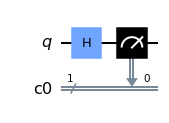

In [3]:
import os
import math 

from getpass import getpass
from coreapi.auth import TokenAuthentication
from qiskit import BasicAer, execute
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

from quantuminspire.credentials import get_authentication
from quantuminspire.qiskit import QI

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

QI.set_authentication()
qi_backend = QI.get_backend('QX single-node simulator')

q = QuantumRegister(1, "q")
c0 = ClassicalRegister(1, "c0")

qc = QuantumCircuit(q, c0, name="coin flip")

qc.h(q[0])

qc.measure(q[0], c0)

qi_job = execute(qc, backend=qi_backend, shots=1024)
qi_result = qi_job.result()
histogram = qi_result.get_counts(qc)
print("\nResult from the remote Quantum Inspire backend:\n")
print('State\tCounts')
[print('{0}\t{1}'.format(state, counts)) for state, counts in histogram.items()]

print("\nResult from the local Qiskit simulator backend:\n")
backend = BasicAer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots=1024)
result = job.result()
print(result.get_counts(qc))
qc.draw(output="mpl")